# Instructions before running this notebook
* Make sure that you have NumPy, SciPy and MatplotLib installed in your environment before running this, else install it using pip.

* Ensure that the datasets "d1.txt", "d2.txt", "d3.txt", "d4.txt" are present in the same directory and are named the same.

* Run all the code blocks to see all the outputs. If some random block is run first before the initial blocks, it may throw an error, as far as possible please run the code blocks from top to bottom in sequence

# Part 1

The first part of this assignment is to assume all the parameters of the fit are unknown. So I have used SciPy's Curve fitting to model to fit a curve to the 4 data sets given

Importing the necessary libraries

In [486]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Defining the mathematical equation to which the data should be fit.
We have assumed that none of the parameters are known to us at the moment


In [487]:
def model(x,h,c,kb,T):
    return (2 * h * (c**2)/(x**5*(np.exp(h*c/(x*kb*T))-1)))

"d1.txt", "d2.txt" , "d3.txt", "d4.txt" are all text files that are present in the same directory as this notebook, opening them and extracting data from them.

In [488]:
x_3=[]
y_3=[]
with open("d3.txt", "r") as f:

    for line in f:
        data = line.strip('\n').split(',')

        if len(data) == 2:
            x_3.append(float(data[0]))
            y_3.append(float(data[1]))


x_3 = np.array(x_3)
y_3 = np.array(y_3)

Now using the data in the x and y arrays, and the model of the system in terms of the parameters that we have to find, we can try to fit a curve using SciPy and trying to find the optimal values of the parameters. An educated initial guess has to be given for this data set for it to converge to an optimal curve. I have given the intial guess close to the order of magnitude of the constants, which is reasonable enough for scientists to have. 

I tune the initial guess on the basis of the diagonal elements of the covariance matrix, which I have also printed out



In [489]:
initial_guess = [6e-34, 3e8,1e-23,4000]

popt, pcov = curve_fit(model, x_3, y_3, p0=initial_guess)

h_opt,c_opt,kb_opt,T_opt = popt

fitted_y = model(x_3, *popt)

print(f"Values of the diagonal elements of covariance matrix {np.diag(pcov)}")
print(f"Optimal h value: {h_opt}, Optimal c value: {c_opt},\nOptimal kb value: {kb_opt}, Optimal T value: {T_opt}")

Values of the diagonal elements of covariance matrix [1.23744184e-56 7.16208662e+26 4.91354450e-36 8.91915568e+17]
Optimal h value: 6.249809406791794e-34, Optimal c value: 300714406.07996106,
Optimal kb value: 1.156888465418878e-23, Optimal T value: 4564.98081314197


The diagonal elements of the covariance matrix can be used to find the standard deviation(write more), this can be used to judge the accuracy of the initial guess, and tune it accordingly 

Now using the optimal values of the parameters, stored in the popt list, we can plot the fitted curve using matplotlib.


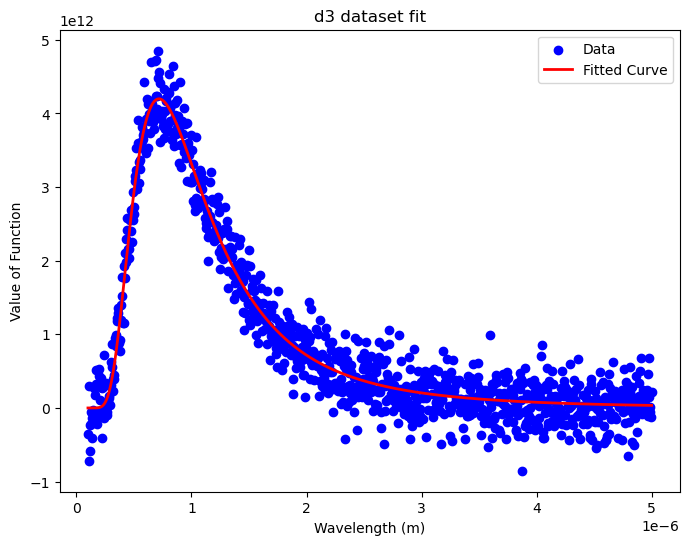

In [490]:
plt.figure(figsize=(8, 6))
plt.scatter(x_3, y_3, label='Data', color='blue', marker='o')
plt.plot(x_3, fitted_y, label='Fitted Curve', color='red', lw=2)
plt.xlabel('Wavelength (m)')
plt.ylabel('Value of Function')
plt.title('d3 dataset fit')
plt.legend()

plt.show()

Doing the same for the other three datasets, d1,d2 and d4. 


In [491]:
x_4=[]
y_4=[]
with open("d4.txt", "r") as f:

    for line in f:
        data = line.strip('\n').split(',')

        if len(data) == 2:
            x_4.append(float(data[0]))
            y_4.append(float(data[1]))


x_4 = np.array(x_4)
y_4 = np.array(y_4)

In [492]:
initial_guess = [6.6e-34, 3e8,1.1e-23,3500]
popt, pcov = curve_fit(model, x_4, y_4, p0=initial_guess)

h_opt,c_opt,kb_opt,T_opt = popt

fitted_y = model(x_4, *popt)

print(f"Values of the diagonal elements of covariance matrix {np.diag(pcov)}")
print(f"Optimal h value: {h_opt}, Optimal c value: {c_opt},\nOptimal kb value: {kb_opt}, Optimal T value: {T_opt}")

Values of the diagonal elements of covariance matrix [1.61815671e-54 8.06716289e+28 4.18598418e-34 5.65887013e+19]
Optimal h value: 6.561600095106175e-34, Optimal c value: 293015066.9290548,
Optimal kb value: 1.232062756702826e-23, Optimal T value: 4282.948616726832


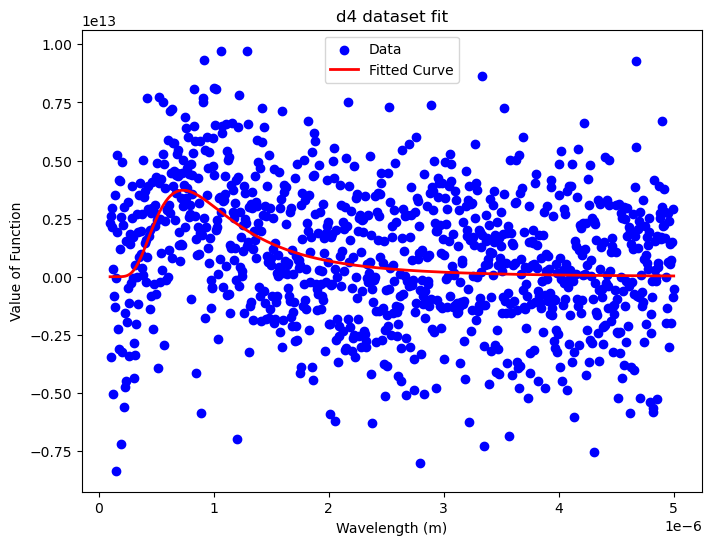

In [493]:
plt.figure(figsize=(8, 6))
plt.scatter(x_4, y_4, label='Data', color='blue', marker='o')
plt.plot(x_4, fitted_y, label='Fitted Curve', color='red', lw=2)
plt.xlabel('Wavelength (m)')
plt.ylabel('Value of Function')
plt.title('d4 dataset fit')
plt.legend()

plt.show()

Doing it for D1 dataset

In [494]:
x_1=[]
y_1=[]
with open("d1.txt", "r") as f:

    for line in f:
        data = line.strip('\n').split(',')

        if len(data) == 2:
            x_1.append(float(data[0]))
            y_1.append(float(data[1]))


x_1 = np.array(x_1)
y_1 = np.array(y_1)

In [495]:
initial_guess = [6.4e-34, 3e8,1e-23,4000]

popt, pcov = curve_fit(model, x_1, y_1, p0=initial_guess)

h_opt,c_opt,kb_opt,T_opt = popt

fitted_y = model(x_1, *popt)

print(f"Values of the diagonal elements of covariance matrix {np.diag(pcov)}")
print(f"Optimal h value: {h_opt}, Optimal c value: {c_opt},\nOptimal kb value: {kb_opt}, Optimal T value: {T_opt}")

Values of the diagonal elements of covariance matrix [7.02394770e-56 7.39054123e+27 2.98122462e-35 1.42953700e+19]
Optimal h value: 5.163928765393971e-34, Optimal c value: 335010023.9714595,
Optimal kb value: 8.905901347698295e-24, Optimal T value: 5456.945165542361


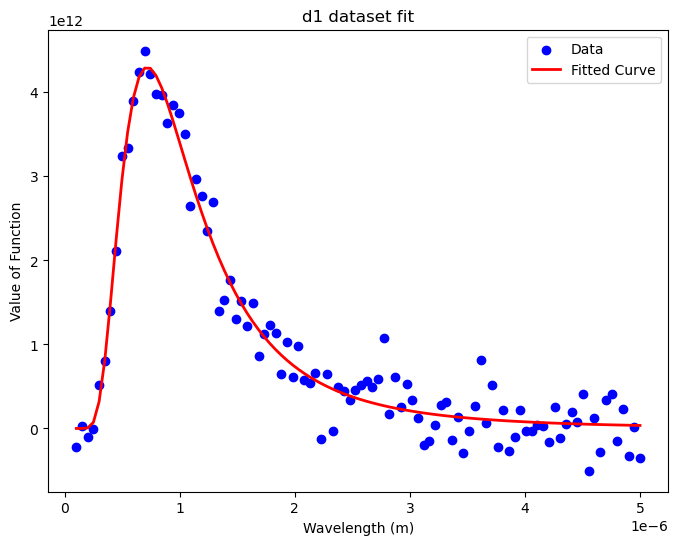

In [496]:
plt.figure(figsize=(8, 6))
plt.scatter(x_1, y_1, label='Data', color='blue', marker='o')
plt.plot(x_1, fitted_y, label='Fitted Curve', color='red', lw=2)
plt.xlabel('Wavelength (m)')
plt.ylabel('Value of Function')
plt.title('d1 dataset fit')
plt.legend()

plt.show()

Doing it for D2 dataset

In [497]:
x_2=[]
y_2=[]
with open("d2.txt", "r") as f:

    for line in f:
        data = line.strip('\n').split(',')

        if len(data) == 2:
            x_2.append(float(data[0]))
            y_2.append(float(data[1]))

x_2 = np.array(x_2)
y_2 = np.array(y_2)

In [498]:
initial_guess = [6.4e-34, 3e8,1e-23,3900]
popt, pcov = curve_fit(model, x_2, y_2, p0=initial_guess)

h_opt,c_opt,kb_opt,T_opt = popt

fitted_y = model(x_2, *popt)

print(f"Values of the diagonal elements of covariance matrix {np.diag(pcov)}")
print(f"Optimal h value: {h_opt}, Optimal c value: {c_opt},\nOptimal kb value: {kb_opt}, Optimal T value: {T_opt}")

Values of the diagonal elements of covariance matrix [5.36397169e-54 6.02949271e+29 3.63757619e-33 6.46079824e+20]
Optimal h value: 4.3878120257127e-34, Optimal c value: 296284548.3485389,
Optimal kb value: 9.777024243866955e-24, Optimal T value: 3983.4429147201467


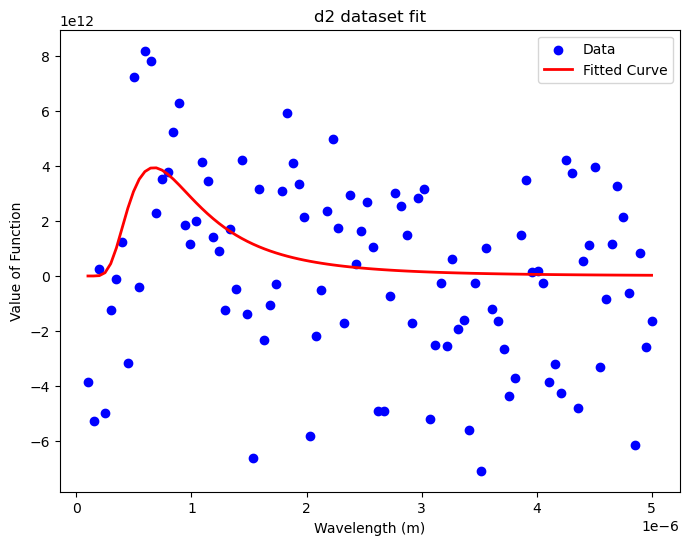

In [499]:
plt.figure(figsize=(8, 6))
plt.scatter(x_2, y_2, label='Data', color='blue', marker='o')
plt.plot(x_2, fitted_y, label='Fitted Curve', color='red', lw=2)
plt.xlabel('Wavelength (m)')
plt.ylabel('Value of Function')
plt.title('d2 dataset fit')
plt.legend()

plt.show()

# Part 2
Now that we tried to fit all the 4 parameters, we see that the values are quite off from the real values, so to increase the accuracy of the estimation of a paramater, we will have to assume some of them to be given, and fit the curve with a less number of paramaters. Since temperature is the quantity we have no idea about, it would be wise to start of with h,c and kb as given constants, and try to find the value of temperature.



In [500]:

#defining the values of the constants
c=3e8
kb=1.380649e-23
h=6.641e-34

#redefining the model to vary only temperature
def model_temp(x,T):
    return (2 * h * (c**2)/(x**5*(np.exp(h*c/(x*kb*T))-1)))

In [501]:
#fitting to the model (using D2 dataset)
initial_guess = [3000]
popt, pcov = curve_fit(model_temp, x_2, y_2, p0=initial_guess)

T_opt_2 = popt

fitted_y = model_temp(x_2, popt)

print(f"Optimal T value from D2 dataset: {popt}")

Optimal T value from D2 dataset: [3965.42032515]


For D1 dataset

In [502]:
#fitting to the model (using D1 dataset)
initial_guess = [3000]

popt, pcov = curve_fit(model_temp, x_1, y_1, p0=initial_guess)

T_opt_1 = popt

fitted_y = model_temp(x_1, popt)

print(f"Optimal T value from D1 dataset: {T_opt_1}")

Optimal T value from D1 dataset: [4028.6837984]


For D3 dataset

In [503]:
#fitting to the model (using D3 dataset)
initial_guess = [3000]
popt, pcov = curve_fit(model_temp, x_3, y_3, p0=initial_guess)

T_opt_3 = popt

fitted_y = model_temp(x_3, popt)

print(f"Optimal T value from D3 dataset: {T_opt_3}")

Optimal T value from D3 dataset: [4009.34175797]


For D4 dataset

In [504]:
#fitting to the model (using D4 dataset)
initial_guess = [10000]
popt, pcov = curve_fit(model_temp, x_4, y_4, p0=initial_guess)

T_opt_4 = popt

fitted_y = model_temp(x_4, popt)

print(f"Optimal T value from D4 dataset: {T_opt_4}")

Optimal T value from D4 dataset: [3913.24049506]


# Making My own Curve Fit Function
I decided to implement the same curve fit function on my own based on least squares method, for this case I have kept k,c and kb as constants and estimate T. 
This is basically the exercise of minimising the loss function. 
I have done this for only d4 dataset. The same can be done for the other 3 datasets by changing the file that you are reading from.


Optimal T = 3913.2000000008215


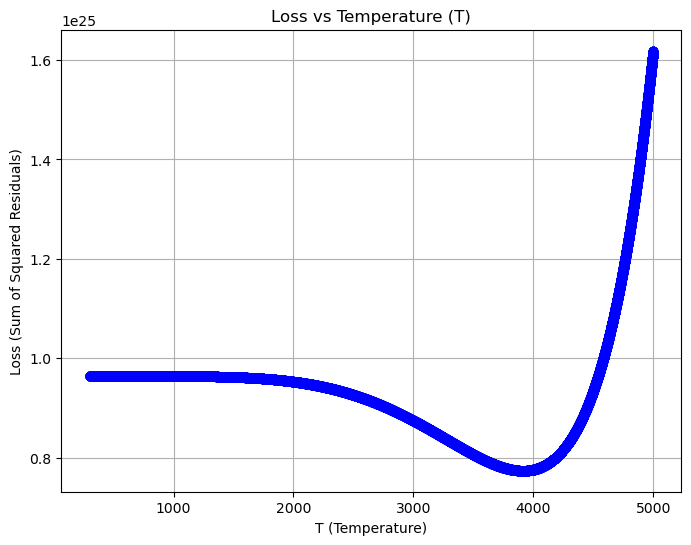

In [506]:
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

#extracting data from the text file and storing it in NumPy arrays\
#if you want to check for another dataset, replace "d4.txt" with the dataset which you want to test with
with open("d4.txt", "r") as f:
    for line in f:
        data = line.strip('\n').split(',')
        if len(data) == 2:
            x.append(float(data[0]))
            y.append(float(data[1]))

x = np.array(x)
y = np.array(y)

#defining the constants
c=3e8
kb=1.380649e-23
h=6.641e-34

#defining the model, here only T is the paramater that has to be fit to
def model(x,T):
    return (2 * h * (c**2)/(x**5*(np.exp(h*c/(x*kb*T))-1)))
    
loss_values = []

#the range of values I have chosen to iterate through
T_values = np.arange(300, 5000,0.1)

#minimum will store the least value of loss, t_opt will store the optimal temperature
min=1e64
t_opt=0

for T in T_values:

    fitted_y = model(x,T)
    loss = np.sum((y - fitted_y) ** 2)/len(x)

    if min >loss:
        min = loss
        t_opt = T

    loss_values.append(loss)        

print("Optimal T =", t_opt)

#plotting loss functin vs temperature
loss_values = np.array(loss_values)
plt.figure(figsize=(8, 6))
plt.plot(T_values, loss_values, marker='o', color='b')
plt.xlabel('T (Temperature)')
plt.ylabel('Loss (Sum of Squared Residuals)')
plt.title('Loss vs Temperature (T)')
plt.grid(True)
plt.show()


As we see, this almost perfectly matches the output of SciPy's curve_fit, and decreasing the step size of T would bring even more accurate results. 
The same can be verified for the other 3 datasets by just opening another dataset.